In [55]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import pandas as pd
import csv

In [56]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [57]:
label_map = {'version_2' : 'npt', 'version_3': 'pt', 'version_4': 'pt_fb'}

In [58]:
path_results = '../../results/'
path_ideal_models = os.path.join(path_results, 'classifier_baseline_bench_resampled_sample')
path_sim_models = os.path.join(path_results, 'classifier_baseline_bench_sim_output')
path_bench_models = os.path.join(path_results, 'classifier_baseline_bench_bench_image')

In [80]:
f1_scores = { 'ideal':{}, 'bench': {}, 'sim': {}}

for version, label in label_map.items():
    f1 = torch.load(os.path.join(path_ideal_models, version, 'classifier_eval/f1_scores.pt'), weights_only=True)
    f1_scores['ideal'][label_map[version]] = f1

    f1 = torch.load(os.path.join(path_bench_models, version, 'classifier_eval/f1_scores.pt'), weights_only=True)
    f1_scores['bench'][label_map[version]] = f1

    f1 = torch.load(os.path.join(path_sim_models, version, 'classifier_eval/f1_scores.pt'), weights_only=True)
    f1_scores['sim'][label_map[version]] = f1

In [86]:
f1_scores['ideal']['npt']['f1_ideal_train']

tensor(0.8850)

In [66]:
f1_score = torch.load(os.path.join(path_ideal_models, 'version_3', 'classifier_eval/f1_scores.pt'), weights_only=True)

In [67]:
f1_score['f1_ideal_train']

tensor(0.9787)

In [78]:
path_metrics = os.path.join(path_ideal_models, 'version_3', 'logs', 'metrics.csv')
metrics = {}
try:
    with open(path_metrics) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for i,row in enumerate(reader):
            if i == 0:
                for header in row:
                    metrics[header] = []
                key_list = list(metrics.keys())
            else:
                for j,value in enumerate(row):
                    metrics[key_list[j]].append(value)
except:
    pass
metrics['epoch'] = np.unique(np.asarray(metrics['epoch'], dtype=int))
metrics['loss_train'] = np.asarray([float(i) for i in metrics['loss_train'] if i != ''])
metrics['loss_val'] = np.asarray([float(i) for i in metrics['loss_val'] if i != ''])

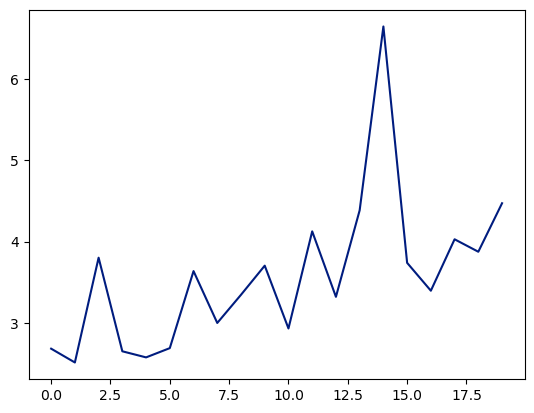

In [79]:
plt.plot(metrics['epoch'], metrics['loss_val'])

In [26]:
train_predictions = torch.load(os.path.join(path_ideal_models, version, 'classifier_eval/train_predictions.pt'), weights_only = True)

In [32]:
from models.models import Classifier

ModuleNotFoundError: No module named 'models'

In [28]:
test_values = torch.load('../../data/baseline/baseline_train_0000.pt', weights_only=True)

In [29]:
target = test_values['target']

In [30]:
target

tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [31]:
torch.argmax(target, dim=-1)

tensor([4])

In [33]:
sys.path.append('../')
from models.models import Classifier

In [49]:
classifier = Classifier.load_from_checkpoint('../../results/classifier_baseline_bench_resampled_sample/version_2/checkpoints/last.ckpt').cpu()

2024-11-25 18:18:48.837 | INFO     | models.models:select_model:59 - Training from scratch
2024-11-25 18:18:48.915 | INFO     | models.models:select_model:83 - Training backbone


In [50]:
sample = test_values['resampled_sample'].unsqueeze(0).unsqueeze(0).cpu()

In [51]:
sample.shape

torch.Size([1, 1, 1080, 1920])

In [53]:
output = classifier(torch.cat([sample, sample, sample], dim=1))

In [54]:
torch.argmax(output, dim=-1)

tensor([4])

In [89]:
import pandas as pd

# Assuming f1_scores is your dictionary
data = []

# Loop through the dictionary to collect data
for train_dataset in f1_scores.keys():
    for model_version in f1_scores[train_dataset].keys():
        for eval_key in f1_scores[train_dataset][model_version].keys():
            f1_value = f1_scores[train_dataset][model_version][eval_key]
            # Split the key to get eval_dataset and split (train/valid)
            _, eval_dataset, split = eval_key.split('_')  # e.g., 'f1_ideal_train' -> ['f1', 'ideal', 'train']
            data.append({
                'TrainDataset': train_dataset,
                'ModelVersion': model_version,
                'EvalDataset': eval_dataset,
                'Split': split,
                'F1Score': f1_value.item()  # Convert tensor to scalar
            })



In [90]:
data

[{'TrainDataset': 'ideal',
  'ModelVersion': 'npt',
  'EvalDataset': 'ideal',
  'Split': 'train',
  'F1Score': 0.8849999904632568},
 {'TrainDataset': 'ideal',
  'ModelVersion': 'npt',
  'EvalDataset': 'bench',
  'Split': 'train',
  'F1Score': 0.32124999165534973},
 {'TrainDataset': 'ideal',
  'ModelVersion': 'npt',
  'EvalDataset': 'sim',
  'Split': 'train',
  'F1Score': 0.8287500143051147},
 {'TrainDataset': 'ideal',
  'ModelVersion': 'npt',
  'EvalDataset': 'ideal',
  'Split': 'valid',
  'F1Score': 0.8500000238418579},
 {'TrainDataset': 'ideal',
  'ModelVersion': 'npt',
  'EvalDataset': 'bench',
  'Split': 'valid',
  'F1Score': 0.28999999165534973},
 {'TrainDataset': 'ideal',
  'ModelVersion': 'npt',
  'EvalDataset': 'sim',
  'Split': 'valid',
  'F1Score': 0.800000011920929},
 {'TrainDataset': 'ideal',
  'ModelVersion': 'pt',
  'EvalDataset': 'ideal',
  'Split': 'train',
  'F1Score': 0.9787499904632568},
 {'TrainDataset': 'ideal',
  'ModelVersion': 'pt',
  'EvalDataset': 'bench',
  '

In [93]:
import pandas as pd

# Assuming f1_scores is your dictionary
data = []

# Loop through the dictionary to collect data
for train_dataset in f1_scores.keys():
    for model_version in f1_scores[train_dataset].keys():
        for eval_key in f1_scores[train_dataset][model_version].keys():
            f1_value = f1_scores[train_dataset][model_version][eval_key]
            # Split the key to get eval_dataset and split (train/valid)
            try:
                _, eval_dataset, split = eval_key.split('_')  # e.g., 'f1_ideal_train' -> ['f1', 'ideal', 'train']
            except ValueError as e:
                print(f"Error splitting key '{eval_key}': {e}")
                continue  # Skip this entry if it doesn't match expected pattern
            f1_value_scalar = f1_value.item() if hasattr(f1_value, 'item') else f1_value
            data.append({
                'TrainDataset': train_dataset,
                'ModelVersion': model_version,
                'EvalDataset': eval_dataset,
                'Split': split,
                'F1Score': f1_value_scalar  # Ensure it's a scalar
            })

# Create a DataFrame
df = pd.DataFrame(data)

# Check for unexpected values
print("Unique EvalDataset values:", df['EvalDataset'].unique())
print("Unique Split values:", df['Split'].unique())

# Pivot the DataFrame to create a table
table = df.pivot_table(
    index=['TrainDataset', 'ModelVersion'],
    columns=['EvalDataset', 'Split'],
    values='F1Score',
    aggfunc='first'  # Use 'first' in case of duplicates
)

# Reset index to convert index back to columns
table = table.reset_index()

# Flatten the MultiIndex columns with handling for None values
def flatten_columns(columns):
    new_columns = []
    for col in columns:
        if isinstance(col, tuple):
            col = ['' if c is None else str(c) for c in col]
            new_columns.append('_'.join(col).strip('_'))
        else:
            new_columns.append(col)
    return new_columns

table.columns = flatten_columns(table.columns.values)

# # Optional: Rearranging columns for clarity
# # List of columns to keep in order
# cols = ['TrainDataset', 'ModelVersion'] + sorted([col for col in table.columns if col not in ['TrainDataset', 'ModelVersion']])

# # Reorder the columns
# table = table[cols]

# Display the table
# print(table)


Unique EvalDataset values: ['ideal' 'bench' 'sim']
Unique Split values: ['train' 'valid']


In [97]:
table[table['TrainDataset'] == 'ideal']

,TrainDataset,ModelVersion,bench_train,bench_valid,ideal_train,ideal_valid,sim_train,sim_valid
3,ideal,npt,0.32125,0.290,0.88500,0.85,0.82875,0.800
4,ideal,pt,0.42750,0.400,0.97875,0.94,0.94375,0.905
5,ideal,pt_fb,0.08375,0.165,0.26375,0.28,0.09750,0.155


In [99]:
table.to_csv('../../results/baseline_classifier_analysis/f1_score_table.csv')

In [111]:
test = pd.read_csv('../../results/baseline_classifier_analysis/f1_score_table.csv', index_col=0)

In [112]:
test

,TrainDataset,ModelVersion,bench_train,bench_valid,ideal_train,ideal_valid,sim_train,sim_valid
0,bench,npt,0.97625,0.875,0.22750,0.155,0.22500,0.155
1,bench,pt,0.98750,0.945,0.31375,0.275,0.32375,0.275
2,bench,pt_fb,0.14125,0.085,0.08375,0.165,0.08375,0.165
3,ideal,npt,0.32125,0.290,0.88500,0.850,0.82875,0.800
4,ideal,pt,0.42750,0.400,0.97875,0.940,0.94375,0.905
5,ideal,pt_fb,0.08375,0.165,0.26375,0.280,0.09750,0.155
6,sim,npt,0.41500,0.350,0.84375,0.760,0.91000,0.855
7,sim,pt,0.68375,0.550,0.90375,0.825,0.90750,0.830
8,sim,pt_fb,0.08375,0.165,0.14500,0.105,0.33250,0.325


In [100]:
# Assuming 'table' is your DataFrame
ideal_train_df = table[table['TrainDataset'] == 'ideal']
# Select the validation columns
validation_columns = ['bench_valid', 'ideal_valid', 'sim_valid']

# Create a new DataFrame with ModelVersion and validation scores
ideal_valid_performance = ideal_train_df[['ModelVersion'] + validation_columns]


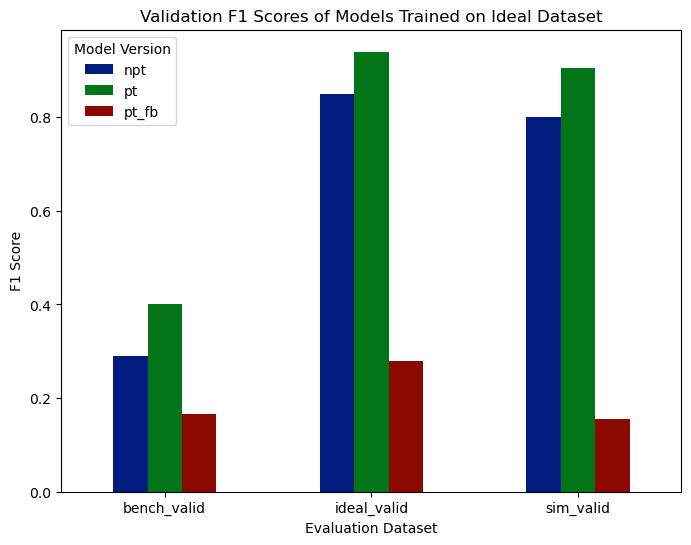

In [101]:
import matplotlib.pyplot as plt

# Set ModelVersion as the index
ideal_valid_performance.set_index('ModelVersion', inplace=True)

# Transpose the DataFrame for plotting
plot_data = ideal_valid_performance.T

# Plot a bar chart
plot_data.plot(kind='bar', figsize=(8, 6))
plt.title('Validation F1 Scores of Models Trained on Ideal Dataset')
plt.ylabel('F1 Score')
plt.xlabel('Evaluation Dataset')
plt.xticks(rotation=0)
plt.legend(title='Model Version')
plt.show()


In [102]:
# Filter for 'pt' model version
pt_models = table[table['ModelVersion'] == 'pt']

# Select validation columns
pt_validation = pt_models[['TrainDataset', 'bench_valid', 'ideal_valid', 'sim_valid']]

# Set TrainDataset as index
pt_validation.set_index('TrainDataset', inplace=True)

print(pt_validation)


              bench_valid  ideal_valid  sim_valid
TrainDataset                                     
bench               0.945        0.275      0.275
ideal               0.400        0.940      0.905
sim                 0.550        0.825      0.830


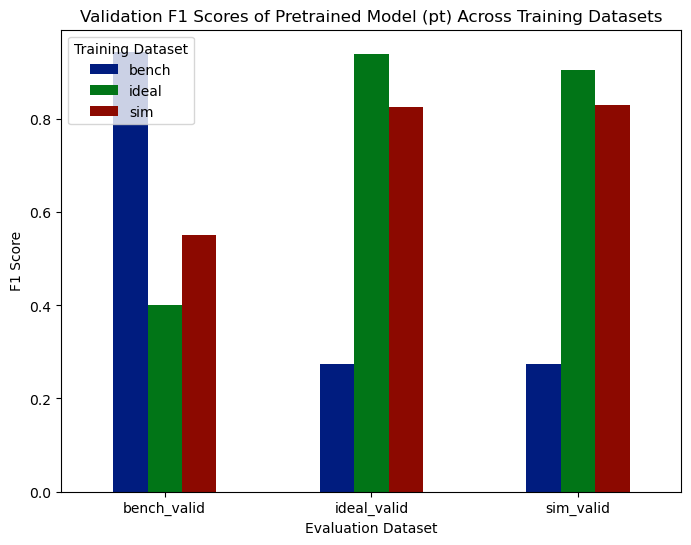

In [103]:
# Transpose the DataFrame for plotting
plot_data_pt = pt_validation.T

# Plot a bar chart
plot_data_pt.plot(kind='bar', figsize=(8, 6))
plt.title('Validation F1 Scores of Pretrained Model (pt) Across Training Datasets')
plt.ylabel('F1 Score')
plt.xlabel('Evaluation Dataset')
plt.xticks(rotation=0)
plt.legend(title='Training Dataset')
plt.show()


In [105]:
# Calculate standard deviation of validation scores for 'pt' models
pt_validation_std = pt_validation.std(axis=1)

print(pt_validation_std)


TrainDataset
bench    0.386825
ideal    0.302173
sim      0.160234
dtype: float64


In [106]:
def compare_model_version(model_version):
    # Filter for the specified model version
    model_df = table[table['ModelVersion'] == model_version]
    # Select validation columns
    validation_columns = ['bench_valid', 'ideal_valid', 'sim_valid']
    model_validation = model_df[['TrainDataset'] + validation_columns]
    # Set TrainDataset as index
    model_validation.set_index('TrainDataset', inplace=True)
    return model_validation

# Use the function to compare 'npt' model version
npt_validation = compare_model_version('npt')
print(npt_validation)


              bench_valid  ideal_valid  sim_valid
TrainDataset                                     
bench               0.875        0.155      0.155
ideal               0.290        0.850      0.800
sim                 0.350        0.760      0.855


In [108]:
import seaborn as sns

# Reshape the DataFrame for heatmap
heatmap_data = ideal_valid_performance.reset_index().melt(id_vars='ModelVersion', var_name='EvalDataset', value_name='F1Score')

# Create a pivot table for the heatmap
heatmap_pivot = heatmap_data.pivot('EvalDataset', 'ModelVersion', 'F1Score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot, annot=True, cmap='viridis')
plt.title('Validation F1 Scores Heatmap for Models Trained on Ideal Dataset')
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given